# Openpaths.cc visualization
Because we can more easily massage the data in Python and we really liked `mplleaflet`.

In [68]:
# Imports
import matplotlib.pyplot as plt
%matplotlib inline
import mplleaflet
import pandas
import geopy
from geopy.geocoders import Nominatim
import geopandas as gpd

plt.rcParams['figure.figsize'] = (16, 9)  # Size up figures a bit

In [69]:
# Load data from CSV
openpaths = pandas.read_csv('openpaths_habi.csv', parse_dates=[3])
openpaths.describe()
# Latitude = NS
# Longitude = WE

,lat,lon,alt,version
count,28275.000000,28275.000000,28275.000000,2.827500e+04
mean,46.336489,14.821240,514.422474,1.100000e+00
std,3.143443,29.446446,362.733171,2.220485e-16
min,30.024679,-9.880663,-48.000000,1.100000e+00
25%,46.931829,7.437073,356.000000,1.100000e+00
50%,46.968079,7.900918,489.330231,1.100000e+00
75%,47.481705,8.220958,553.736145,1.100000e+00
max,53.586563,141.174377,3893.417969,1.100000e+00


In [70]:
# Use only this years data
plot_current_year = True
if plot_current_year:
    whichyear = 2016
    thisyear = openpaths[pandas.Timestamp(str(whichyear)) < openpaths['date']]
    thisyear = thisyear[thisyear['date'] < pandas.Timestamp(str(whichyear + 1))]
    thisyear.describe()
else:
    thisyear = openpaths

In [71]:
# Plot all data points, colored by their altitude
subset=10
plt.scatter(thisyear['lon'][::subset],
            thisyear['lat'][::subset],
            c=thisyear['alt'][::subset], edgecolor='none', alpha=0.5, cmap='Reds')
mplleaflet.display(tiles='stamen_toner')

In [72]:
# Address search with `geopy` and https://wiki.openstreetmap.org/wiki/Nominatim
geolocator = Nominatim()
location = geolocator.reverse('%s, %s' % (thisyear['lat'].mean(), thisyear['lon'].mean()))
print('The mean location in %s was in %s in %s' % (whichyear,
                                                   location.raw.get('address').get('suburb'),
                                                   location.raw.get('address').get('country')))
plt.scatter(thisyear['lon'].mean(), thisyear['lat'].mean(), marker='o', s=500, color='k', alpha=0.5)
mplleaflet.display()

The mean location in 2016 was in Chardonnière in France


In [73]:
# Cardinal extremes: north
point = (thisyear[thisyear['lat'] == thisyear['lat'].max()])
location = geolocator.reverse('%s, %s' % (point.iloc[0]['lat'], point.iloc[0]['lon']))
#print(location.raw)
print('The most northly location in %s was in %s in %s' % (whichyear,
                                                     location.raw.get('address').get('village'),
                                                     location.raw.get('address').get('country')))

plt.scatter(point.iloc[0]['lon'], point.iloc[0]['lat'], marker='o', color='k', s=500, alpha=0.5)
mplleaflet.display(tiles='osm')

The most northly location in 2016 was in Döttingen in Schweiz, Suisse, Svizzera, Svizra


In [74]:
# Cardinal extremes: east
point = (thisyear[thisyear['lon'] == thisyear['lon'].max()])
location = geolocator.reverse('%s, %s' % (point.iloc[0]['lat'], point.iloc[0]['lon']))
#print(location.raw)
print('The most eastern location in %s was in %s in %s' % (whichyear,
                                                     location.raw.get('address').get('village'),
                                                     location.raw.get('address').get('country')))

plt.scatter(point.iloc[0]['lon'], point.iloc[0]['lat'], marker='o', color='k', s=500, alpha=0.5)
mplleaflet.display(tiles='osm')

The most eastern location in 2016 was in Landquart in Schweiz, Suisse, Svizzera, Svizra


In [75]:
# Cardinal extremes: south
point = (thisyear[thisyear['lat'] == thisyear['lat'].min()])
location = geolocator.reverse('%s, %s' % (point.iloc[0]['lat'], point.iloc[0]['lon']))
#print(location.raw)
print('The most western location in %s was in %s in %s' % (whichyear,
                                                     location.raw.get('address').get('village'),
                                                     location.raw.get('address').get('country')))

plt.scatter(point.iloc[0]['lon'], point.iloc[0]['lat'], marker='o', color='k', s=500, alpha=0.5)
mplleaflet.display(tiles='osm')

The most western location in 2016 was in Sidi Ouassay ⵙⵉⴷⵉ ⵡⴰⵙⴰⵢ سيدي وساي in Maroc ⵍⵎⵖⵔⵉⴱ المغرب


In [76]:
# Cardinal extremes: west
point = (thisyear[thisyear['lon'] == thisyear['lon'].min()])
location = geolocator.reverse('%s, %s' % (point.iloc[0]['lat'], point.iloc[0]['lon']))
#print(location.raw)
print('The most western location in %s was in %s in %s' % (whichyear,
                                                     location.raw.get('address').get('town'),
                                                     location.raw.get('address').get('country')))

plt.scatter(point.iloc[0]['lon'], point.iloc[0]['lat'], marker='o', color='k', s=500, alpha=0.5)
mplleaflet.display(tiles='osm')

The most western location in 2016 was in Tamri ⵜⴰⵎⵔⵉ تامري in Maroc ⵍⵎⵖⵔⵉⴱ المغرب


In [77]:
# Highest point
point = thisyear.loc[thisyear['alt'] == thisyear['alt'].max()]
location = geolocator.reverse('%s, %s' % (point.iloc[0]['lat'], point.iloc[0]['lon']))
print('The highest point in %s was in %s in %s at %0.1f MASL' % (whichyear,
                                                              location.raw.get('address').get('suburb'),
                                                              location.raw.get('address').get('village'),
                                                              point['alt']))
plt.scatter(point['lon'], point['lat'], marker='o', color='k', s=500, alpha=0.5)
mplleaflet.display(tiles='osm')

The highest point in 2016 was in Trockener Steg in Zermatt at 3893.4 MASL


In [78]:
# Lowest point
above_sealevel = thisyear.loc[thisyear['alt'] > 0] # there's some wrong GPS data, we didn't dive with the phone :)
point = above_sealevel.loc[above_sealevel['alt'] == above_sealevel['alt'].min()]
location = geolocator.reverse('%s, %s' % (point.iloc[0]['lat'], point.iloc[0]['lon']))
location = geolocator.reverse('%s, %s' % (point.iloc[0]['lat'], point.iloc[0]['lon']))
print('The lowest point in %s was in %s in %s at %0.1f MASL' % (whichyear,
                                                                location.raw.get('address').get('village'),
                                                                location.raw.get('address').get('country'),
                                                                point.iloc[0]['alt']))
plt.scatter(point['lon'], point['lat'], marker='o', color='k', s=500, alpha=0.5)
mplleaflet.display(tiles='osm')

The lowest point in 2016 was in Sidi Ouassay ⵙⵉⴷⵉ ⵡⴰⵙⴰⵢ سيدي وساي in Maroc ⵍⵎⵖⵔⵉⴱ المغرب at 1.6 MASL


Based on the idea foun in [this blog post](http://lenguyenthedat.com/drawing-maps-python/) we get a shape file of Switzerland from [Mapzen](https://mapzen.com/data/borders/).
The direct link to the shape file for Switzerland is [here](https://s3.amazonaws.com/osm-polygons.mapzen.com/switzerland_geojson.tgz).
On top of this we make a [hexbin plot](http://matplotlib.org/examples/pylab_examples/hexbin_demo.html) of the location in Swizerland, especially for [Yves](http://habi.gna.ch/2016/01/15/where-have-i-been-in-2015/#comment-22434).

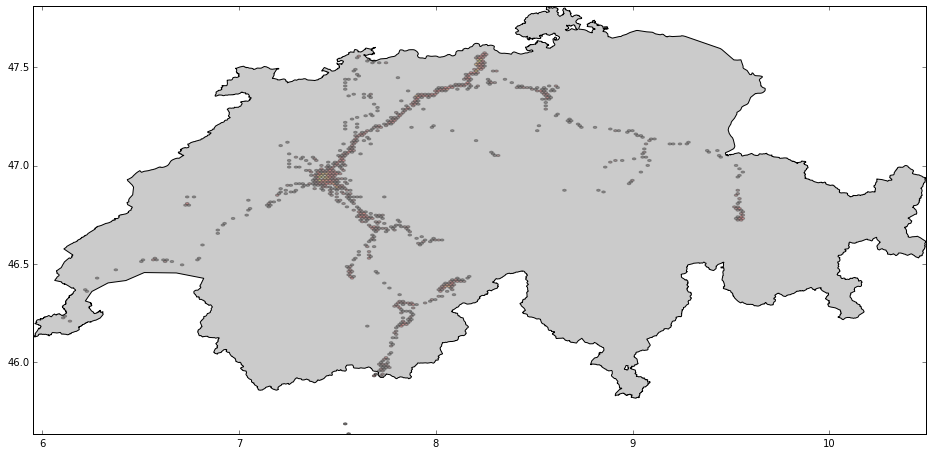

In [79]:
# Load the shape file and display it
switzerland = gpd.GeoDataFrame.from_file('admin_level_2.geojson')
switzerland.geometry.plot()
# Overplot with a hexagon plot  of the locations.
# Nudge the axis limits in such a way that we only see Switzerland
gridsize = 200
location_in_switzerland = thisyear.loc[thisyear['lon'] > 5]
location_in_switzerland = location_in_switzerland.loc[location_in_switzerland['lon'] < 11]
location_in_switzerland = location_in_switzerland.loc[location_in_switzerland['lat'] > 45.5]
location_in_switzerland = location_in_switzerland.loc[location_in_switzerland['lat'] < 48]

plt.hexbin(location_in_switzerland['lon'], location_in_switzerland['lat'],
           cmap='hot',
           gridsize=gridsize,
           bins='log',
           mincnt=1,
           edgecolor='k',
           alpha=0.5)